# About Dataset

This dataset was manually scraped by me from  LinkedIn and contains more all 23 available job listing for data analyst and data scientist positions in Tallinn Estonia on 1st of January 2023, with features such as:

Comapy name
Company field
Company size based on employee count
Type of work 
Seniority
Job Description and more.

## 1. Load the data

In [57]:
import pandas as pd

In [58]:
# read the data set using pandas .read_csv() method
df_job_skills = pd.read_csv('Job offers_ data science and Data analyst; Tallinn,Estonia 01.01.2023 - Лист1.csv')

In [59]:
df_job_skills.head()


,Job titel,Job description,Company,Employees,Field,Type of work,Level,Remote
0,Finance Product Data Analyst,As a financial institution moving billions of ...,Wise,"1,001-5,000",Financial Services,Full-time,Entry level,-
1,Data Governance Analyst in Data Governance tea...,SEB is a leading northern European financial s...,SEB Eesti,"1,001-5,000",Financial Services,Full-time,-,-
2,Data Analyst at Baltic Banking AML/Fraud Inves...,Are you experienced data analyst with interest...,Swedbank,"10,001+",Financial Services,Full-time,-,-
3,Data Analyst,Bolt is one of Europe’s leading technology com...,Bolt,"1,001-5,000",Computer Software,Full-time,Entry level,-
4,Growth Analyst,"As a Growth Analyst, you will be central to th...",Bolt,"1,001-5,001",Computer Software,Full-time,Entry level,-


Data includes job title ,  job description , employees count ,company name , company field, type of work and position level.

## 2. Clean the data


In [60]:
df_job_skills.drop(['Remote'], axis=1,inplace=True)

In [61]:
df_job_skills.head()


,Job titel,Job description,Company,Employees,Field,Type of work,Level
0,Finance Product Data Analyst,As a financial institution moving billions of ...,Wise,"1,001-5,000",Financial Services,Full-time,Entry level
1,Data Governance Analyst in Data Governance tea...,SEB is a leading northern European financial s...,SEB Eesti,"1,001-5,000",Financial Services,Full-time,-
2,Data Analyst at Baltic Banking AML/Fraud Inves...,Are you experienced data analyst with interest...,Swedbank,"10,001+",Financial Services,Full-time,-
3,Data Analyst,Bolt is one of Europe’s leading technology com...,Bolt,"1,001-5,000",Computer Software,Full-time,Entry level
4,Growth Analyst,"As a Growth Analyst, you will be central to th...",Bolt,"1,001-5,001",Computer Software,Full-time,Entry level


## 3. Explore the dataset

In [62]:
df_job_skills.describe()


,Job titel,Job description,Company,Employees,Field,Type of work,Level
count,24,24,24,24,24,24,24
unique,23,24,10,4,7,1,4
top,Data Scientist,As a financial institution moving billions of ...,Bolt,"1,001-5,000",Computer Software,Full-time,Mid-Senior level
freq,2,1,13,13,13,24,12


Althogh dataset is small we can see that only 10 companies are hiring Data scientist and Data Analysts at the moment in Tallinn (01/01/2023), the most preffered level of knowledge is mid to senior and field is quite expected - Computer Software. Company with the most openings - Bolt.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

Simplyfing job titels to see which one are for Data scientists and which for Data analyst for further analysis:

In [64]:
 def title_simplifier(title):
        if 'scientist' in title.lower():
            return 'data scientist'
        elif 'analyst' in title.lower():
            return 'data analyst'
        elif 'engineer' in title.lower():
            return 'data engineer'
        elif 'manager' in title.lower():
            return 'manager'
        elif 'machine learning' in title.lower():
            return 'machine learning'
        else:
            return 'na'

In [65]:
df_job_skills['job_simp'] = df_job_skills['Job titel'].apply(title_simplifier)

In [66]:
df_job_skills.job_simp.value_counts()


data analyst      17
data scientist     6
na                 1
Name: job_simp, dtype: int64

Dataset has 17 offers for data analyst, 6 offers for data scientist and 1 not specified. This corresponds with 24 job offers we had in total.


Job description length:

In [67]:
df_job_skills['desc_len'] = df_job_skills['Job description'].apply(lambda x: len(x))
df_job_skills['desc_len']

0     4319
1     3489
2     2760
3     2250
4     1195
5     2449
6     6336
7     3230
8     2732
9     3183
10    5227
11    2860
12    3272
13    2094
14    2673
15    2578
16    3053
17    3008
18    2775
19    1924
20    2076
21    2404
22    3652
23    3655
Name: desc_len, dtype: int64

In [68]:
df_job_skills.head()

,Job titel,Job description,Company,Employees,Field,Type of work,Level,job_simp,desc_len
0,Finance Product Data Analyst,As a financial institution moving billions of ...,Wise,"1,001-5,000",Financial Services,Full-time,Entry level,data analyst,4319
1,Data Governance Analyst in Data Governance tea...,SEB is a leading northern European financial s...,SEB Eesti,"1,001-5,000",Financial Services,Full-time,-,data analyst,3489
2,Data Analyst at Baltic Banking AML/Fraud Inves...,Are you experienced data analyst with interest...,Swedbank,"10,001+",Financial Services,Full-time,-,data analyst,2760
3,Data Analyst,Bolt is one of Europe’s leading technology com...,Bolt,"1,001-5,000",Computer Software,Full-time,Entry level,data analyst,2250
4,Growth Analyst,"As a Growth Analyst, you will be central to th...",Bolt,"1,001-5,001",Computer Software,Full-time,Entry level,data analyst,1195


In [69]:
df_job_skills.describe()


,desc_len
count,24.000000
mean,3049.750000
std,1079.888732
min,1195.000000
25%,2437.750000
50%,2817.500000
75%,3326.250000
max,6336.000000


##Looking for skills like python SQL etc.

In [70]:
df_job_skills['python_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df_job_skills.python_skill.value_counts()

1    17
0     7
Name: python_skill, dtype: int64

In [71]:
df_job_skills['sql_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df_job_skills.sql_skill.value_counts()

1    21
0     3
Name: sql_skill, dtype: int64

In [72]:
df_job_skills['excel_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df_job_skills.excel_skill.value_counts()

0    15
1     9
Name: excel_skill, dtype: int64

In [73]:
df_job_skills['aws_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df_job_skills.aws_skill.value_counts()

0    18
1     6
Name: aws_skill, dtype: int64

In [74]:
df_job_skills['r_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df_job_skills.r_skill.value_counts()

0    24
Name: r_skill, dtype: int64

In [75]:
df_job_skills['spark_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df_job_skills.spark_skill.value_counts()

0    22
1     2
Name: spark_skill, dtype: int64

In [76]:
df_job_skills['tableau_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df_job_skills.tableau_skill.value_counts()

0    18
1     6
Name: tableau_skill, dtype: int64

In [77]:
df_job_skills['powerbi_skill'] = df_job_skills['Job description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
df_job_skills.powerbi_skill.value_counts()

0    22
1     2
Name: powerbi_skill, dtype: int64

In [78]:
# We got nothing for R and Spark so let´s drop them
df_job_skills.drop(['r_skill'], axis=1,inplace=True)
df_job_skills.drop(['spark_skill'], axis=1,inplace=True)

In [79]:
df_job_skills.head()

,Job titel,Job description,Company,Employees,Field,Type of work,Level,job_simp,desc_len,python_skill,sql_skill,excel_skill,aws_skill,tableau_skill,powerbi_skill
0,Finance Product Data Analyst,As a financial institution moving billions of ...,Wise,"1,001-5,000",Financial Services,Full-time,Entry level,data analyst,4319,1,1,0,0,1,0
1,Data Governance Analyst in Data Governance tea...,SEB is a leading northern European financial s...,SEB Eesti,"1,001-5,000",Financial Services,Full-time,-,data analyst,3489,0,0,1,0,0,0
2,Data Analyst at Baltic Banking AML/Fraud Inves...,Are you experienced data analyst with interest...,Swedbank,"10,001+",Financial Services,Full-time,-,data analyst,2760,1,1,0,0,0,0
3,Data Analyst,Bolt is one of Europe’s leading technology com...,Bolt,"1,001-5,000",Computer Software,Full-time,Entry level,data analyst,2250,1,1,1,1,1,0
4,Growth Analyst,"As a Growth Analyst, you will be central to th...",Bolt,"1,001-5,001",Computer Software,Full-time,Entry level,data analyst,1195,0,1,1,0,0,0


##Exploring eductaion level needed:


In [80]:
def education(level):
        if 'bachelor' in level.lower():
            return 'bachelor'
        elif 'bsc' in level.lower():
            return 'bachelor'
        elif 'master' in level.lower():
            return 'master'
        elif 'msc' in level.lower():
            return 'master'
        elif 'phd' in level.lower():
            return 'Phd'
        else:
            return 'na'

In [81]:
df_job_skills['education_lvl'] = df_job_skills['Job description'].apply(education)

In [82]:
df_job_skills.education_lvl.value_counts()

na          14
bachelor     6
master       4
Name: education_lvl, dtype: int64

Error because some descriptions have more than one. Trying again.


In [83]:
df_job_skills.drop(['education_lvl'], axis=1,inplace=True)

In [84]:
miniumum_qualifications_string = " ".join(str(v) for v in 'Job description').lower()
degree_list = ["ba", "bs", "bachelor's","master's", "phd"]

In [85]:
import re
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'ba': 0, 'bs': 0, "bachelor's": 0, "master's": 0, 'phd': 0}


Failed again. 

In [86]:
df_job_skills['masters'] = df_job_skills['Job description'].apply(lambda x: 1 if 'master' in x.lower() else 0)
df_job_skills.masters.value_counts()

0    20
1     4
Name: masters, dtype: int64

In [87]:
df_job_skills['bachelors'] = df_job_skills['Job description'].apply(lambda x: 1 if 'bachelor' in x.lower() else 0)
df_job_skills.bachelors.value_counts()

0    21
1     3
Name: bachelors, dtype: int64

In [88]:
df_job_skills['PhD'] = df_job_skills['Job description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)
df_job_skills.PhD.value_counts()

0    21
1     3
Name: PhD, dtype: int64

In [89]:
df_job_skills.describe()

,desc_len,python_skill,sql_skill,excel_skill,aws_skill,tableau_skill,powerbi_skill,masters,bachelors,PhD
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3049.750000,0.708333,0.875000,0.375000,0.250000,0.250000,0.083333,0.166667,0.125000,0.125000
std,1079.888732,0.464306,0.337832,0.494535,0.442326,0.442326,0.282330,0.380693,0.337832,0.337832
min,1195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2437.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2817.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3326.250000,1.000000,1.000000,1.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
max,6336.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Exploring with visualizations 

C:\Users\Margarita\AppData\Local\Temp\ipykernel_14692\1842812165.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df_job_skills.corr())
C:\Users\Margarita\AppData\Local\Temp\ipykernel_14692\1842812165.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_job_skills.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)


<AxesSubplot: >

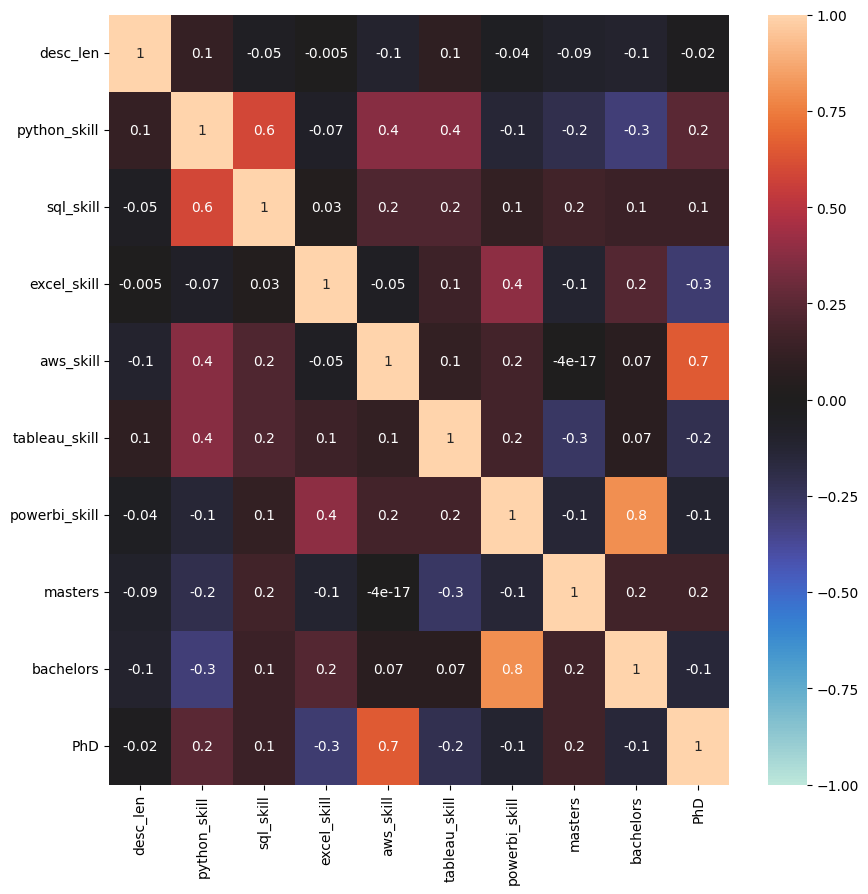

In [90]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df_job_skills.corr())
sns.heatmap(df_job_skills.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)


<AxesSubplot: >

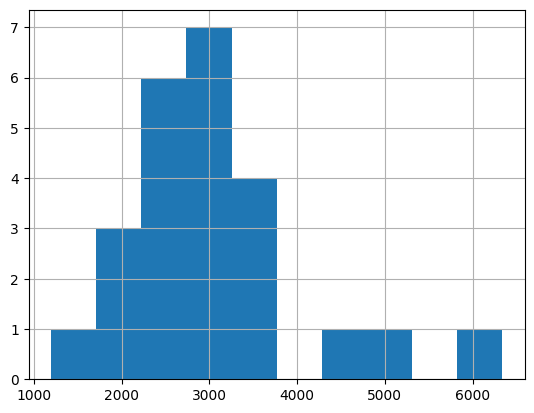

In [91]:
df_job_skills.desc_len.hist()

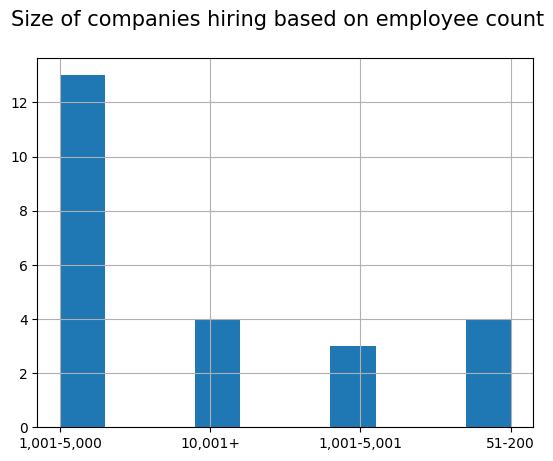

In [92]:
df_job_skills.Employees.hist()
plt.suptitle("Size of companies hiring based on employee count", fontsize=15)
plt.savefig('Company size count.png')

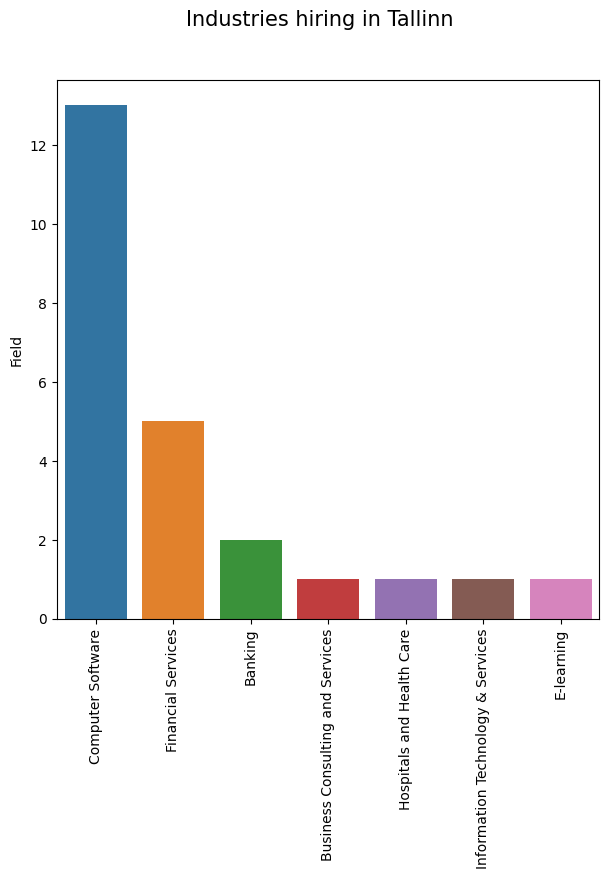

In [93]:
fig, ax = plt.subplots(figsize=(7,7)) 
chart = sns.barplot(x=df_job_skills.Field.value_counts().index, y=df_job_skills.Field.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.suptitle("Industries hiring in Tallinn", fontsize=15)
plt.savefig('Job industry count.png')

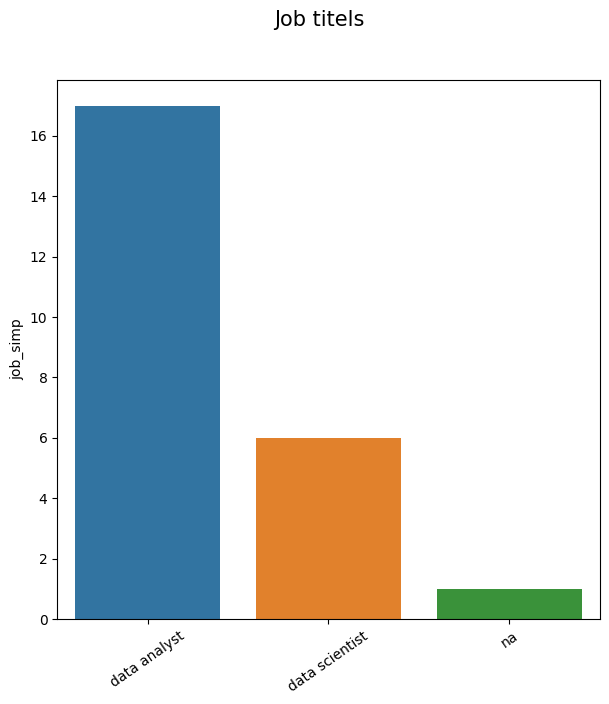

In [94]:
fig, ax = plt.subplots(figsize=(7,7)) 
chart = sns.barplot(x=df_job_skills.job_simp.value_counts().index, y=df_job_skills.job_simp.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=35)
plt.suptitle("Job titels", fontsize=15)
plt.savefig('Job title count.png')